# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'AUDUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

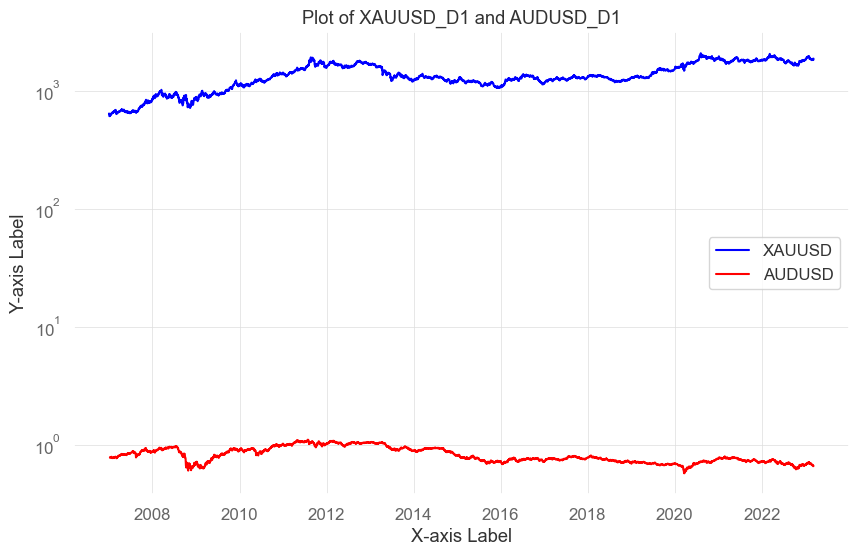

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          5.923e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:45:23   Log-Likelihood:                         -37301.
No. Observations:                5054   AIC:                                  7.460e+04
Df Residuals:                    5053   BIC:                                  7.461e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1598.4162      6.568    243.377      0.000    1585.541    1611.292
==============================================================================
Omnibus:                      189.083   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.164
Skew:                           0.329   Prob(JB):                     1.82e-32
Kurtosis:                       2.488   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-10
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -70.59%
CAGR﹪                     -5.09%

Sharpe                     -0.3
Prob. Sharpe Ratio         8.98%
Smart Sharpe               -0.29
Sortino                    -0.4
Smart Sortino              -0.4
Sortino/√2                 -0.28
Smart Sortino/√2           -0.28
Omega                      0.94

Max Drawdown               -79.82%
Longest DD Days            5715
Volatility (ann.)          16.11%
Calmar                     -0.06
Skew                       -0.8
Kurtosis                   13.46

Expected Daily %           -0.02%
Expected Monthly %         -0.63%
Expected Yearly %          -6.95%
Kelly Criterion            -2.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.69%
Expected Shortfall (cVaR)  -1.69%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-07-18,2019-06-13,2023-03-10,5715,-79.820434,-78.925025
2,2007-01-12,2007-02-26,2007-06-07,147,-9.582775,-9.265113
3,2007-07-06,2007-07-10,2007-07-16,11,-1.900123,-1.520018
4,2007-06-10,2007-06-19,2007-06-25,16,-1.518311,-1.418197
5,2007-06-27,2007-06-29,2007-07-04,8,-0.769150,-0.559250


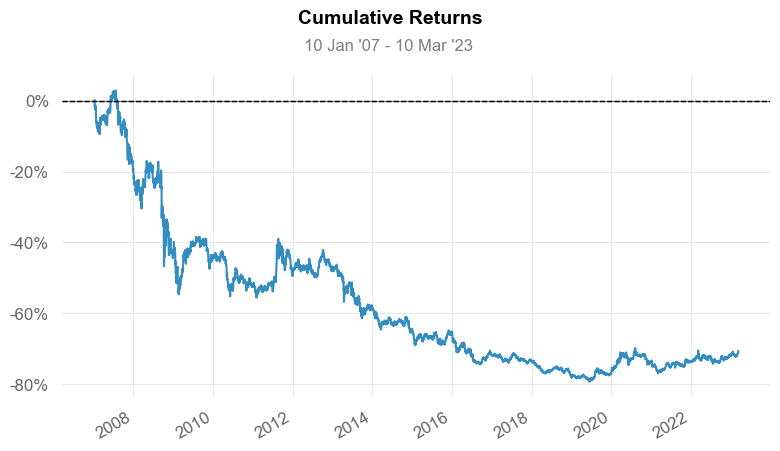

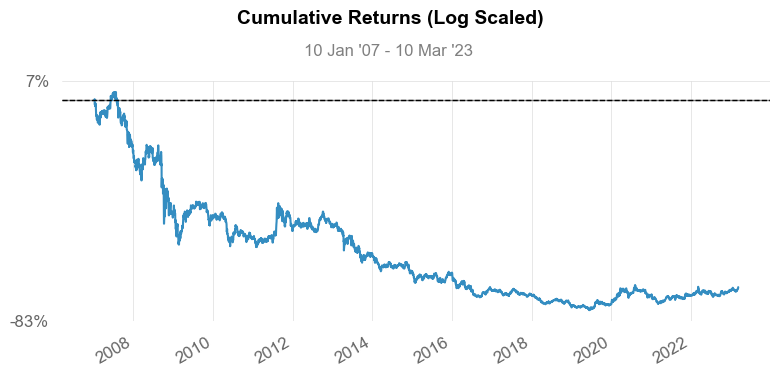

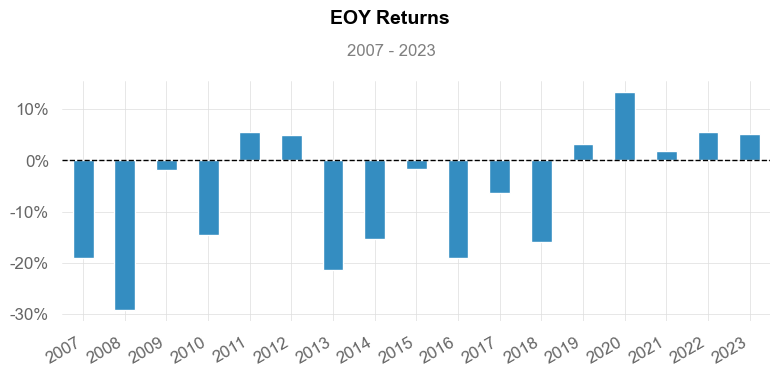

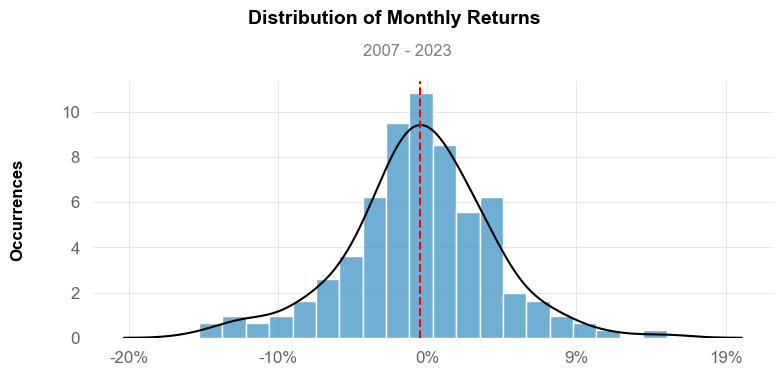

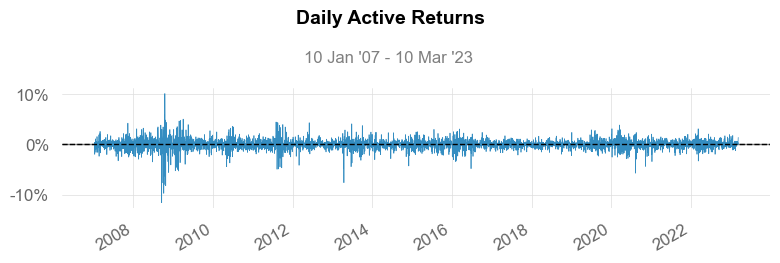

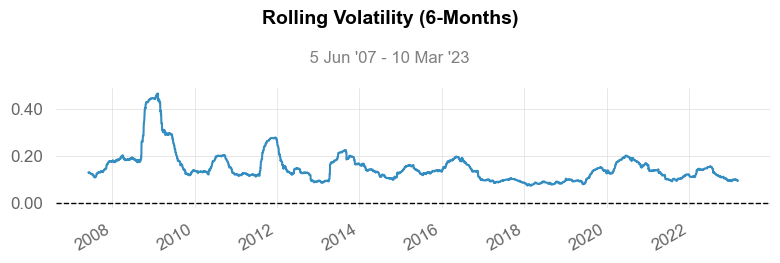

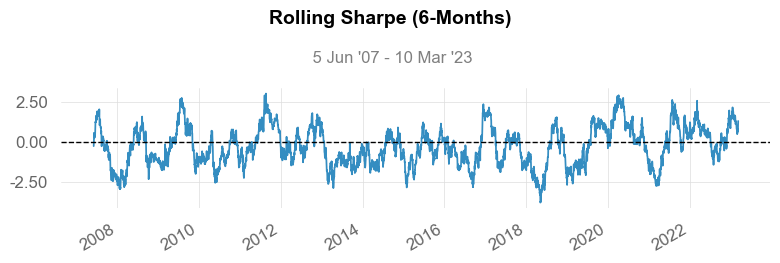

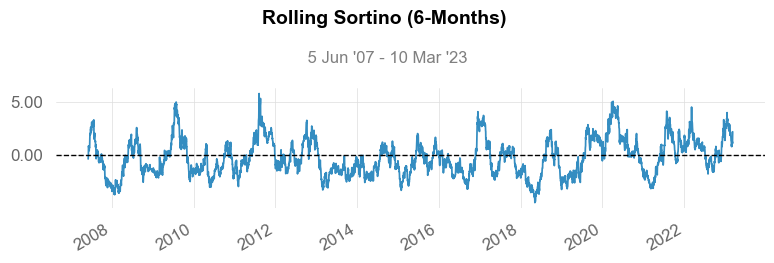

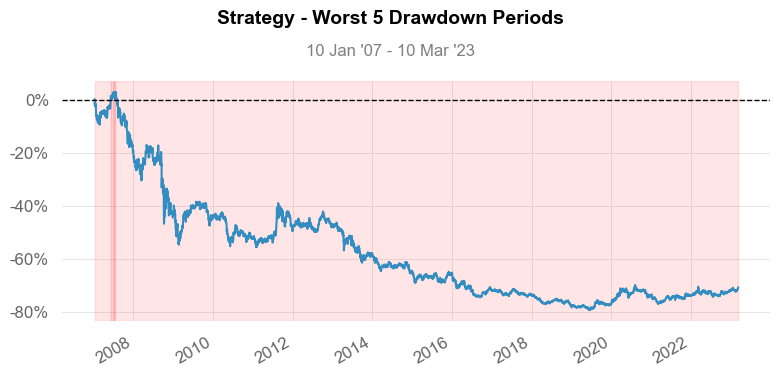

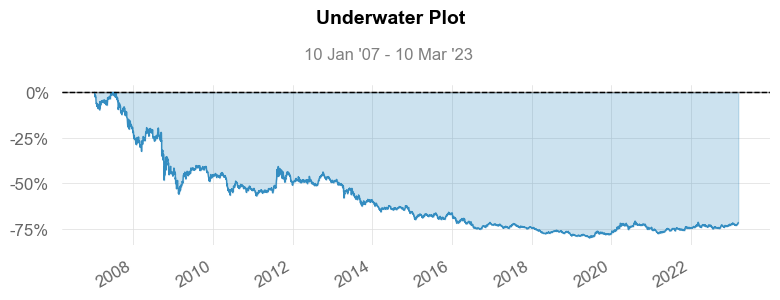

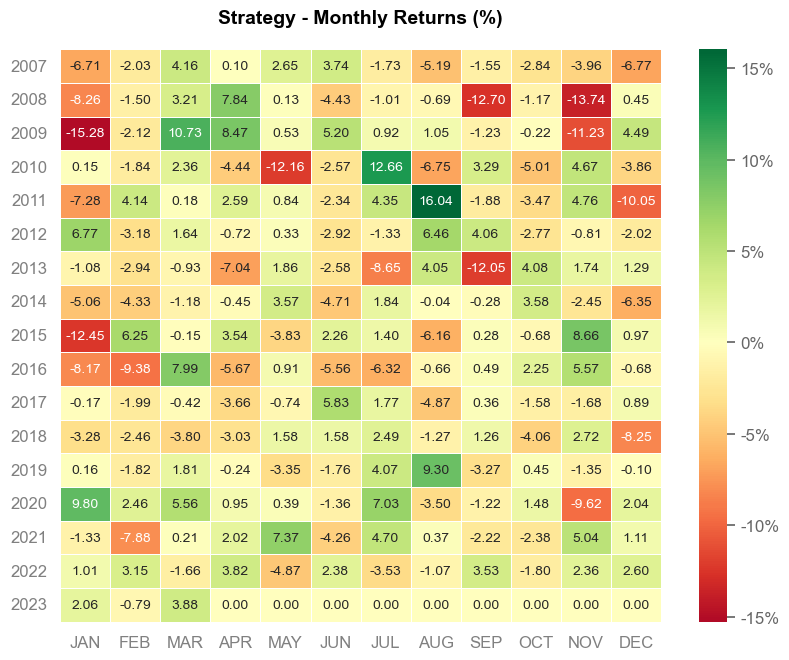

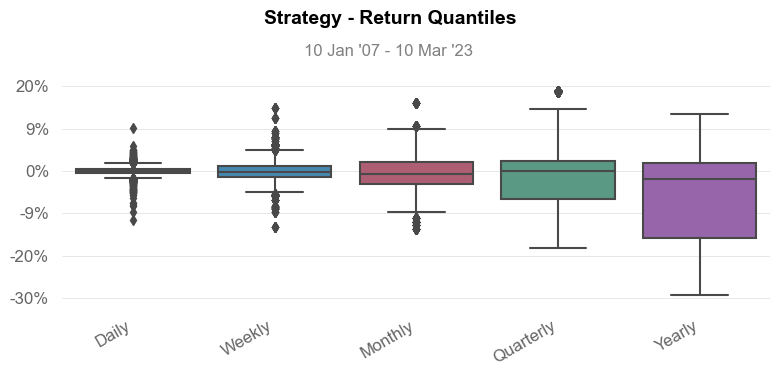

In [12]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [13]:
TF = 'H4'

In [14]:
data_1 = XAUUSD[TF]

In [15]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

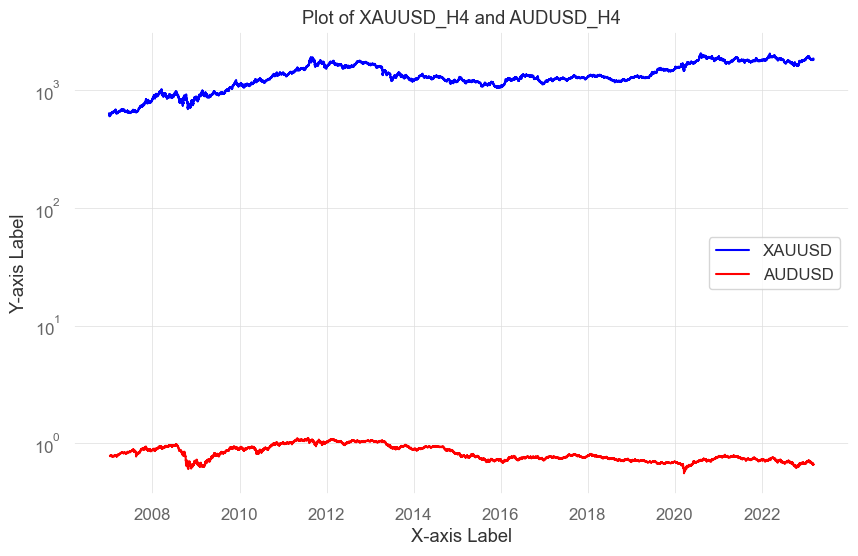

In [16]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [17]:
KF = Kalman_Filter(data_1, data_2)

In [18]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.072e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:47:03   Log-Likelihood:                     -1.9088e+05
No. Observations:               25875   AIC:                                  3.818e+05
Df Residuals:                   25874   BIC:                                  3.818e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.0711      2.892    554.282      0.000    1597.402    1608.740
==============================================================================
Omnibus:                      972.436   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.510
Skew:                           0.332   Prob(JB):                    1.45e-164
Kurtosis:                       2.491   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -29.19%
CAGR﹪                     -1.46%

Sharpe                     -0.29
Prob. Sharpe Ratio         9.69%
Smart Sharpe               -0.28
Sortino                    -0.41
Smart Sortino              -0.39
Sortino/√2                 -0.29
Smart Sortino/√2           -0.28
Omega                      0.94

Max Drawdown               -51.51%
Longest DD Days            5860
Volatility (ann.)          5.4%
Calmar                     -0.03
Skew                       0.39
Kurtosis                   21.31

Expected Daily %           -0.01%
Expected Monthly %         -0.18%
Expected Yearly %          -2.01%
Kelly Criterion            -3.14%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.57%
Expected Shortfall (cVaR)  -0.57%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-02-23,2019-06-14,2023-03-10,5860,-51.508405,-50.807208
2,2007-01-17,2007-01-22,2007-01-23,7,-0.300042,-0.186183
3,2007-02-02,2007-02-05,2007-02-11,10,-0.261468,-0.247676
4,2007-02-19,2007-02-19,2007-02-21,3,-0.128238,-0.109886
5,2007-01-26,2007-01-28,2007-01-28,3,-0.121697,-0.039804


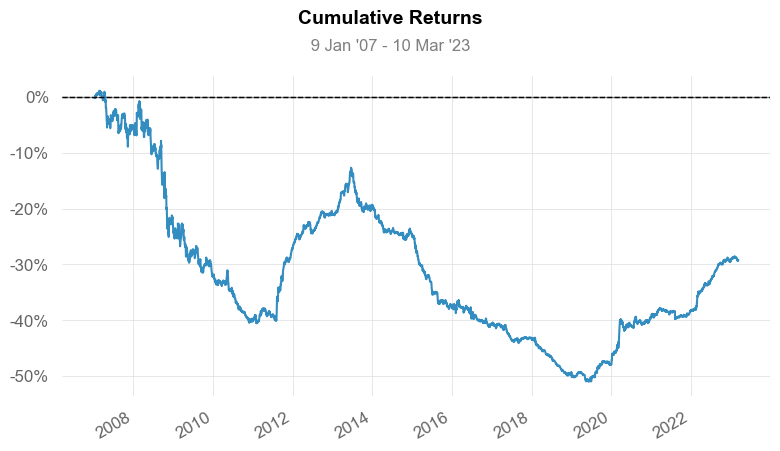

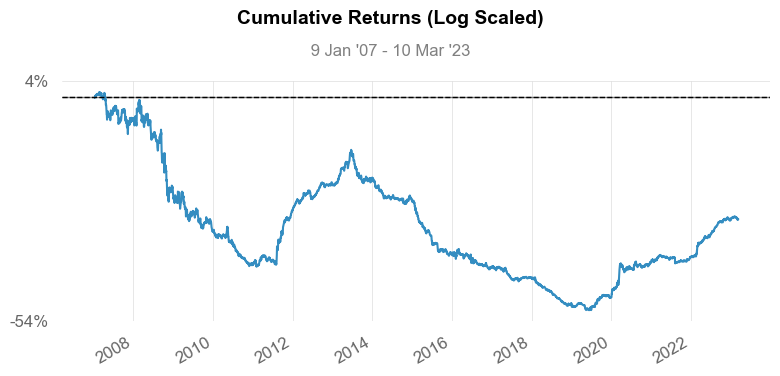

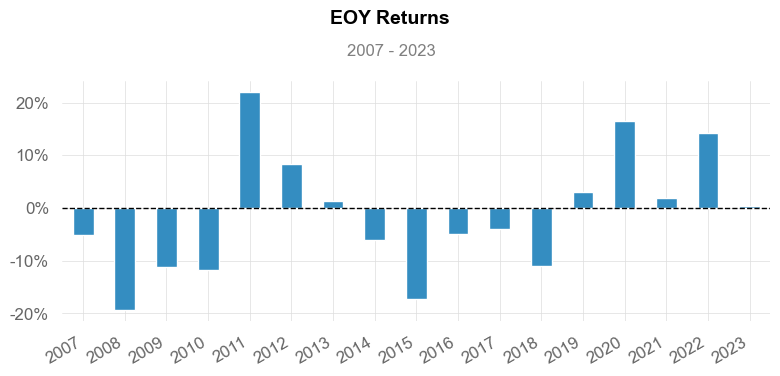

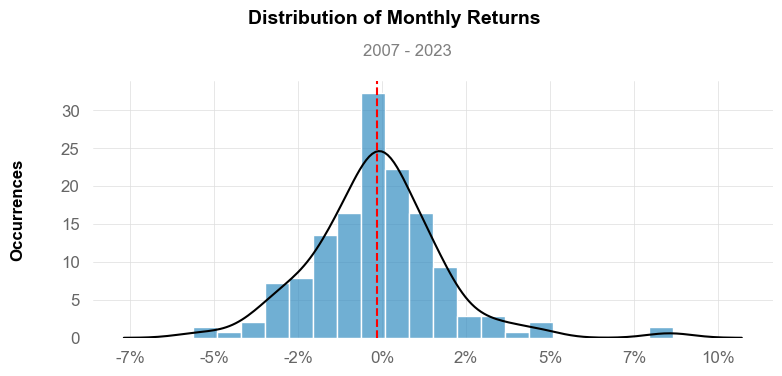

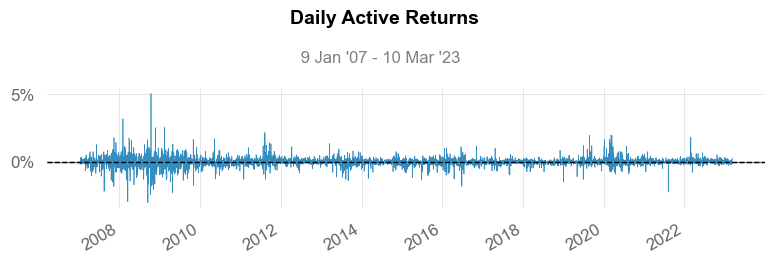

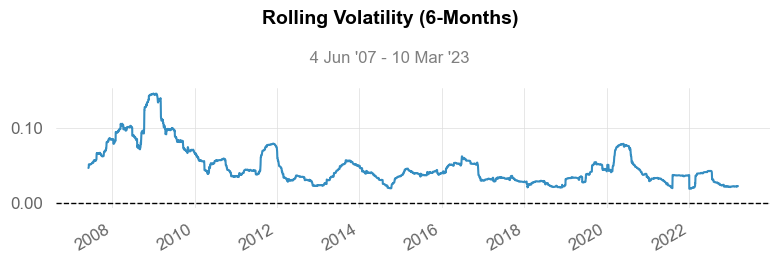

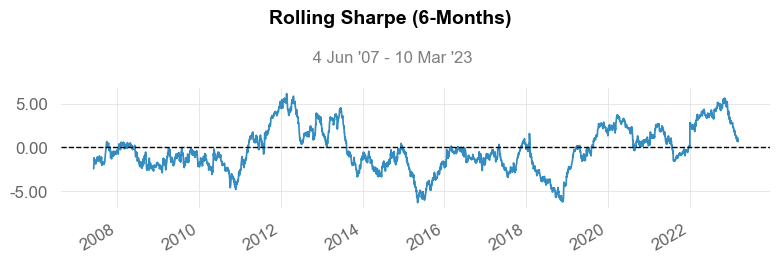

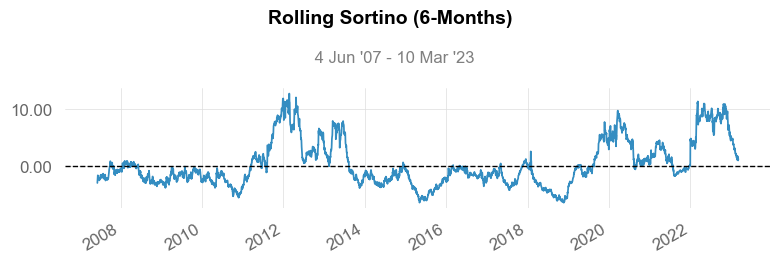

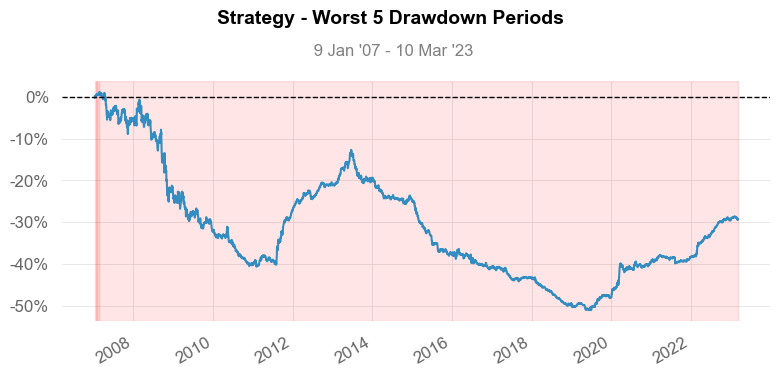

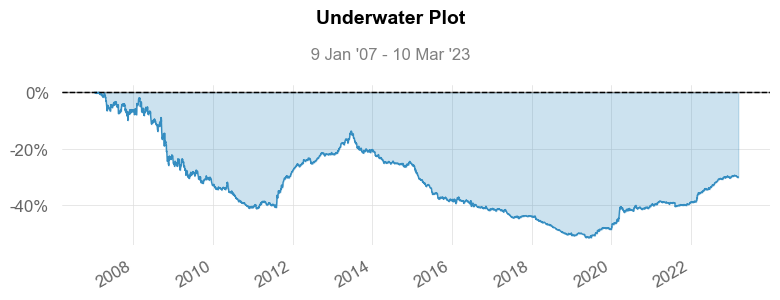

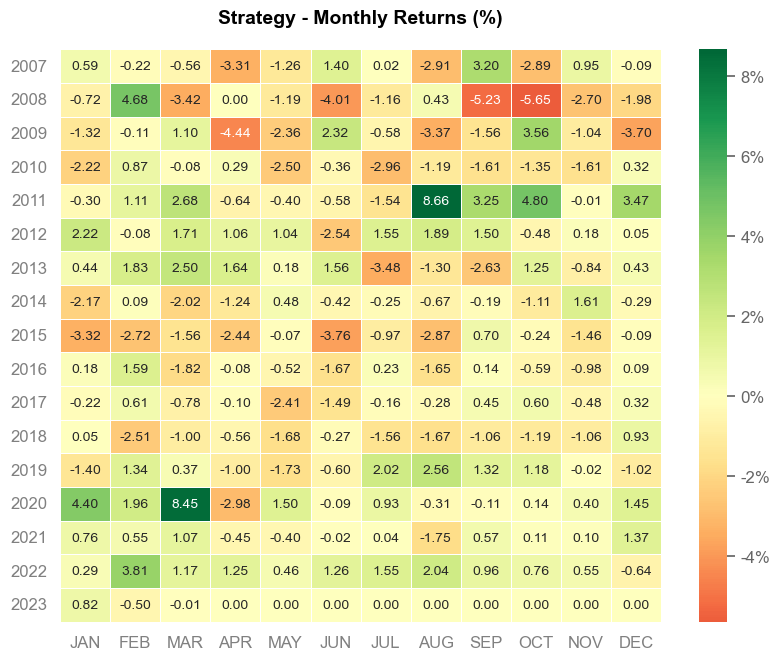

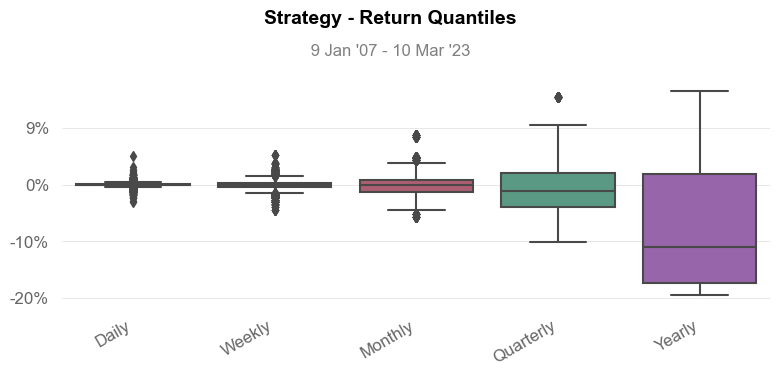

In [20]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [21]:
TF = 'H1'

In [22]:
data_1 = XAUUSD[TF]

In [23]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

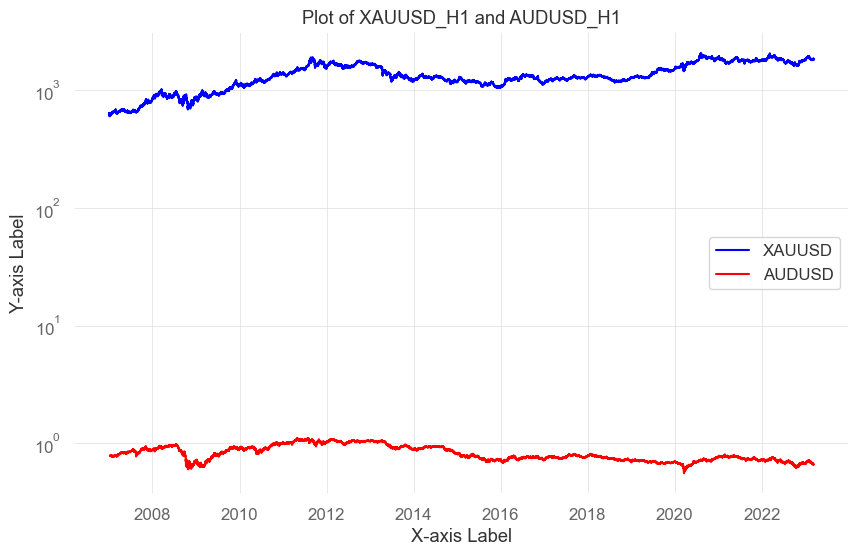

In [24]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [25]:
KF = Kalman_Filter(data_1, data_2)

In [26]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          1.188e+06
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:50:51   Log-Likelihood:                     -7.3809e+05
No. Observations:              100053   AIC:                                  1.476e+06
Df Residuals:                  100052   BIC:                                  1.476e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.1824      1.471   1089.808      0.000    1600.299    1606.066
==============================================================================
Omnibus:                     3771.902   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2917.794
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -7.53%
CAGR﹪                     -0.33%

Sharpe                     -0.1
Prob. Sharpe Ratio         32.59%
Smart Sharpe               -0.1
Sortino                    -0.14
Smart Sortino              -0.14
Sortino/√2                 -0.1
Smart Sortino/√2           -0.1
Omega                      0.98

Max Drawdown               -30.04%
Longest DD Days            5294
Volatility (ann.)          3.32%
Calmar                     -0.01
Skew                       -0.13
Kurtosis                   18.39

Expected Daily %           -0.0%
Expected Monthly %         -0.04%
Expected Yearly %          -0.46%
Kelly Criterion            -1.0%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.35%
Expected Shortfall (cVaR)  -0.35%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2018-12-24,2023-03-10,5294,-30.036238,-29.768580
2,2007-01-10,2008-01-16,2008-08-13,582,-4.975742,-4.165646
3,2008-08-15,2008-09-04,2008-09-07,24,-1.391698,-1.385631


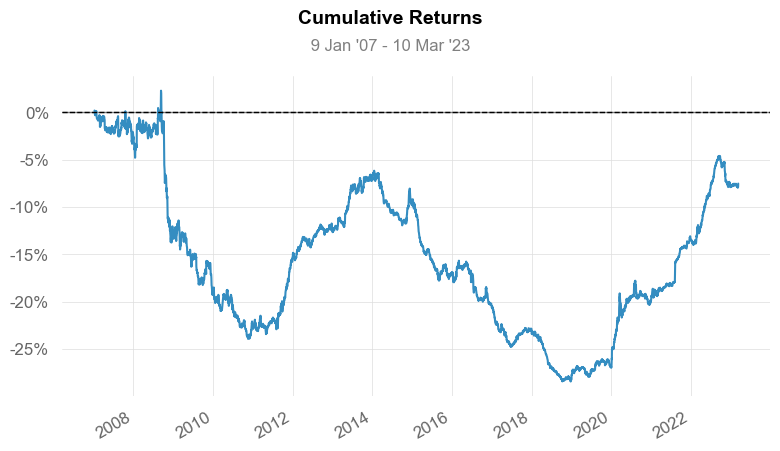

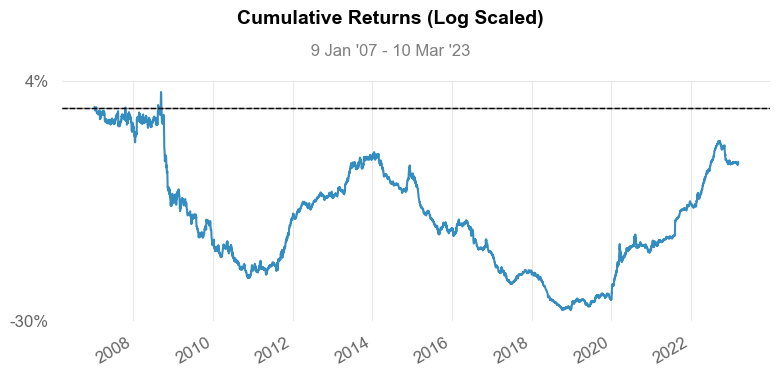

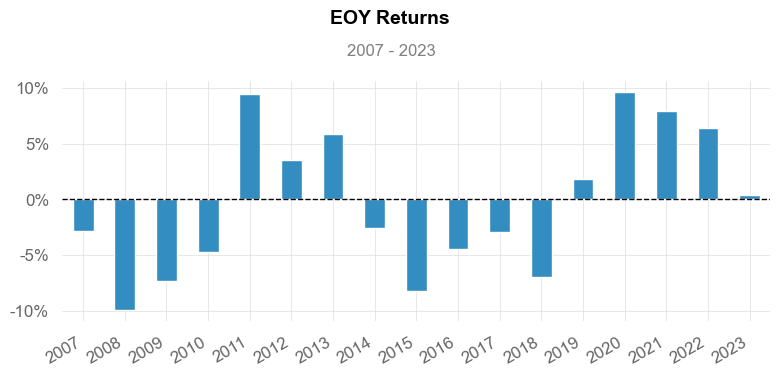

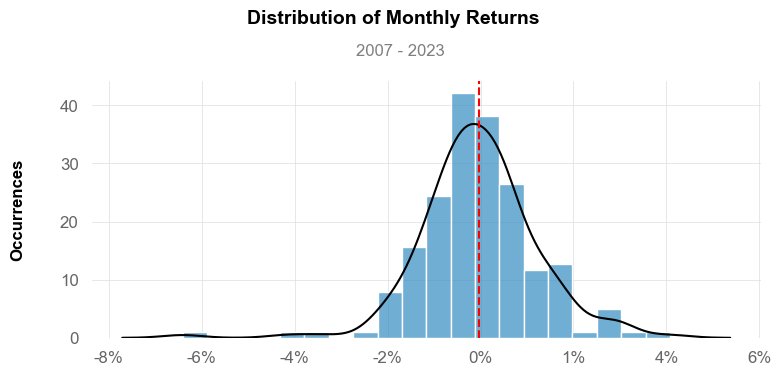

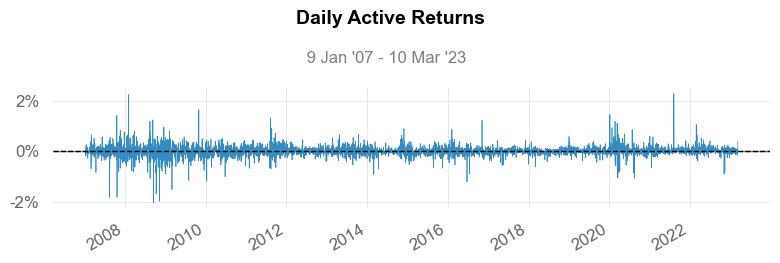

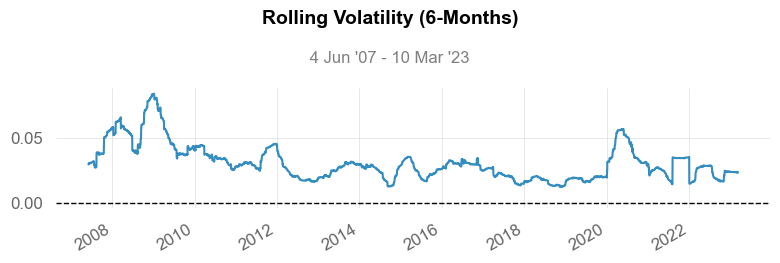

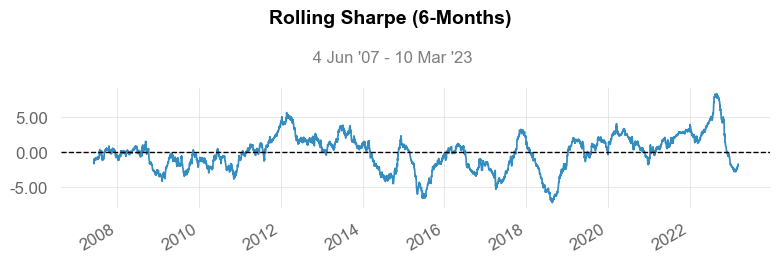

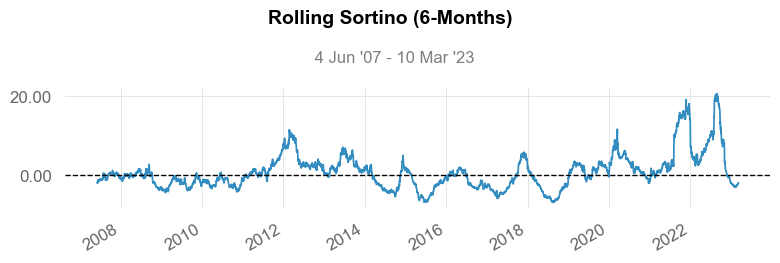

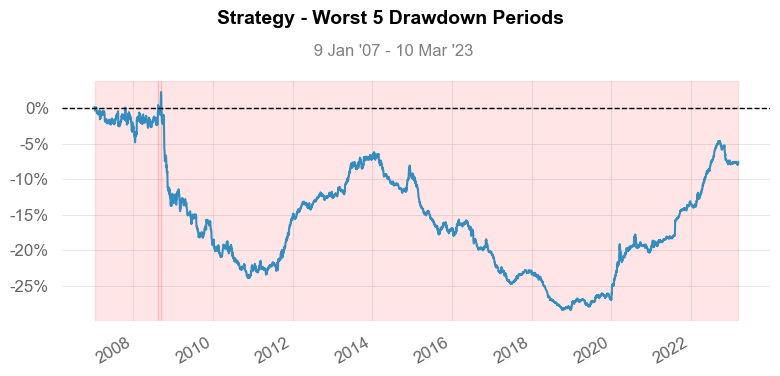

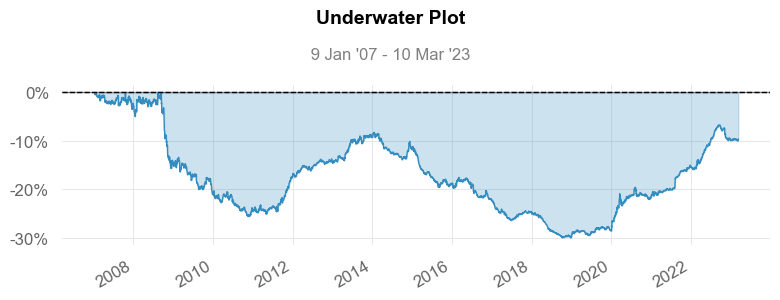

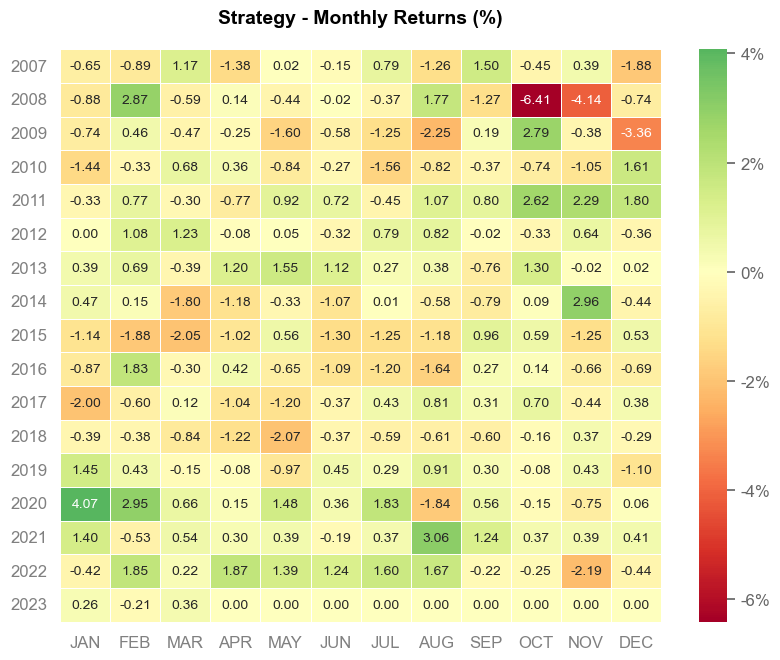

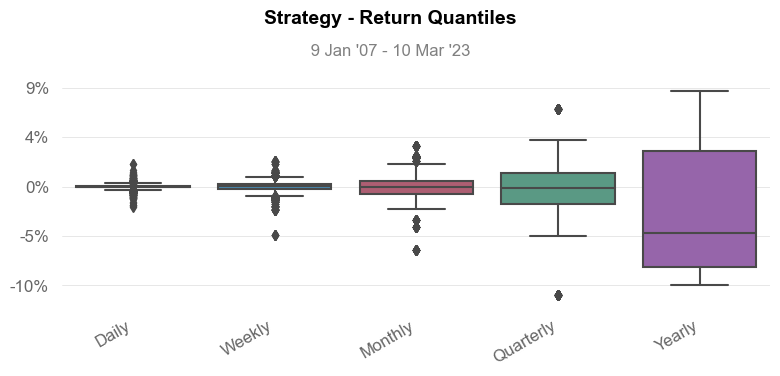

In [28]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [32]:
TF = 'M30'

In [33]:
data_1 = XAUUSD[TF]

In [34]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

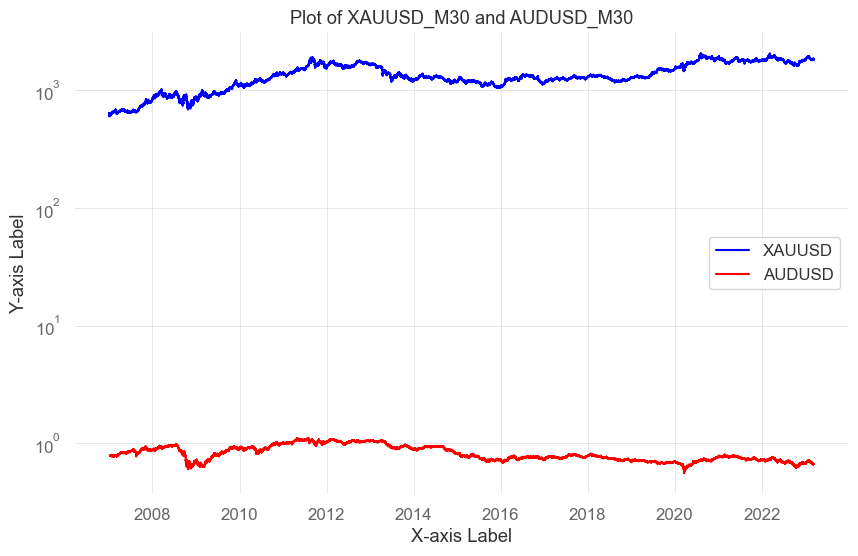

In [35]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [36]:
KF = Kalman_Filter(data_1, data_2)

In [37]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.375e+06
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        00:11:46   Log-Likelihood:                     -1.4754e+06
No. Observations:              200000   AIC:                                  2.951e+06
Df Residuals:                  199999   BIC:                                  2.951e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.3836      1.040   1541.058      0.000    1601.344    1605.423
==============================================================================
Omnibus:                     7534.816   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5825.262
Skew:                           0.331   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
result = KF.Run()

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-01-09
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          7.54%
CAGR﹪                     0.31%

Sharpe                     0.18
Prob. Sharpe Ratio         78.63%
Smart Sharpe               0.18
Sortino                    0.25
Smart Sortino              0.25
Sortino/√2                 0.18
Smart Sortino/√2           0.17
Omega                      1.03

Max Drawdown               -14.4%
Longest DD Days            3333
Volatility (ann.)          2.17%
Calmar                     0.02
Skew                       -0.41
Kurtosis                   10.12

Expected Daily %           0.0%
Expected Monthly %         0.04%
Expected Yearly %          0.43%
Kelly Criterion            1.68%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.22%
Expected Shortfall (cVaR)  -0.22%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2014-01-24,2018-12-23,2023-03-10,3333,-14.401513,-14.169068
2,2008-09-14,2009-10-02,2013-04-26,1686,-8.897212,-8.610754
3,2007-01-10,2007-05-01,2007-10-18,282,-2.525258,-2.432166
4,2007-12-30,2008-03-16,2008-09-09,255,-2.437740,-2.287970
5,2013-07-08,2013-08-15,2013-09-04,59,-1.092502,-1.056108


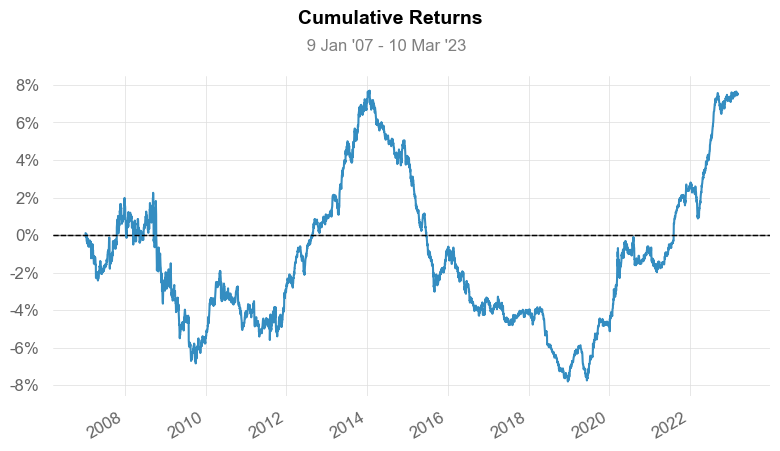

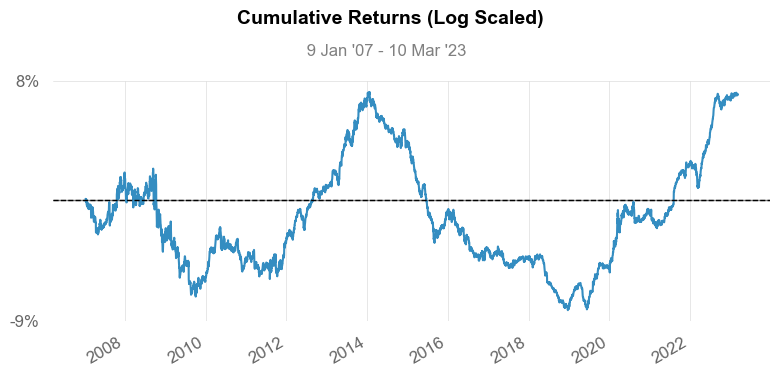

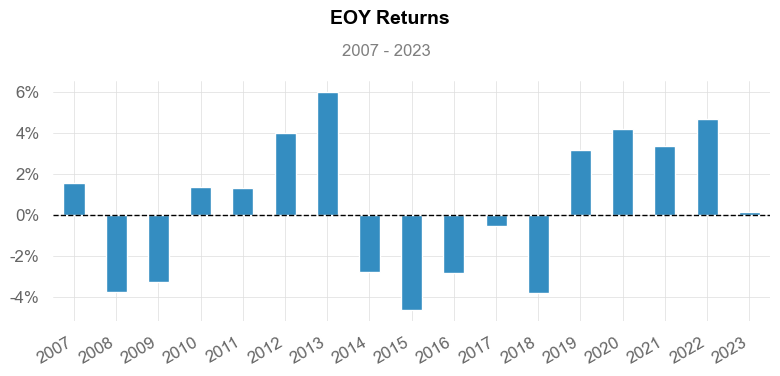

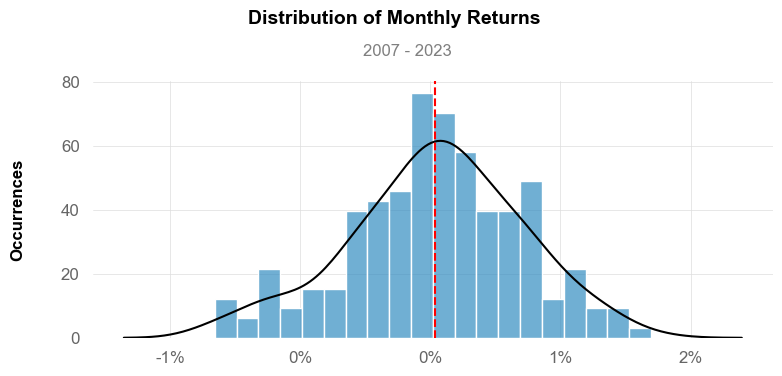

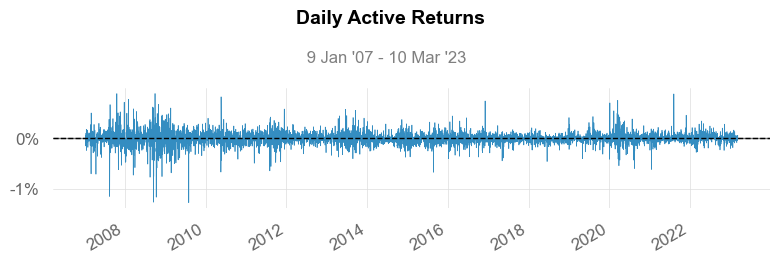

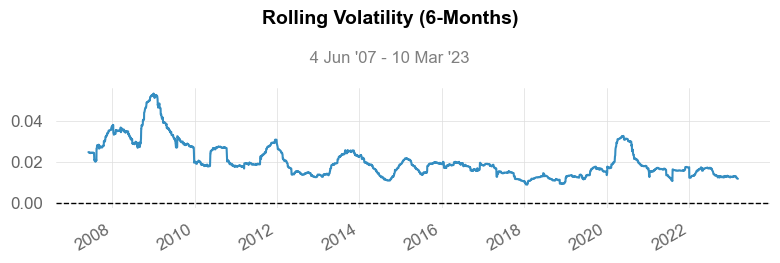

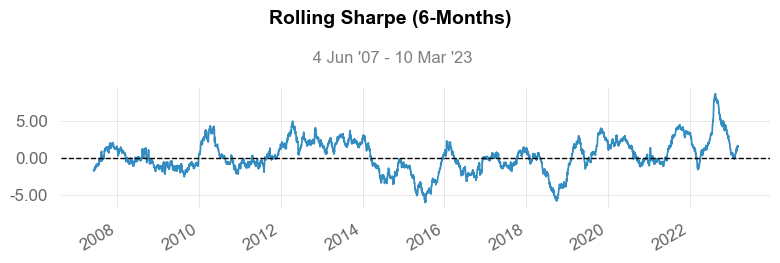

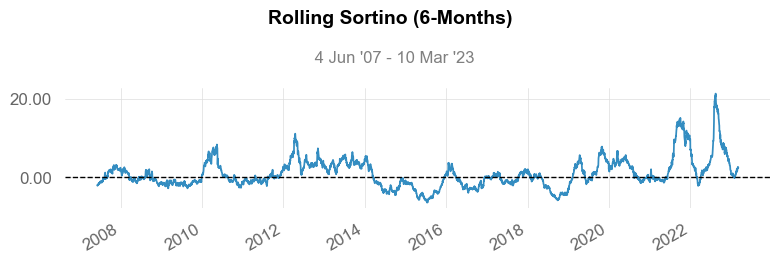

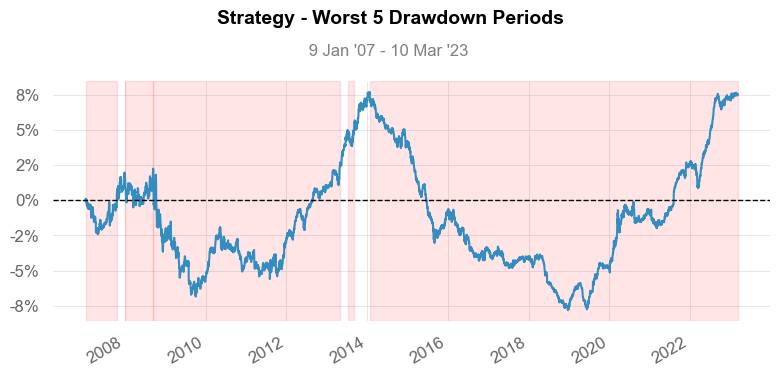

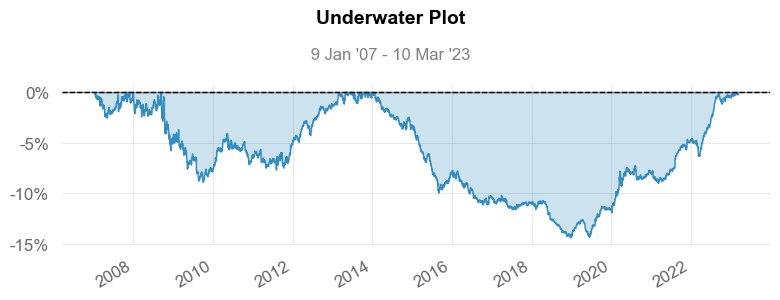

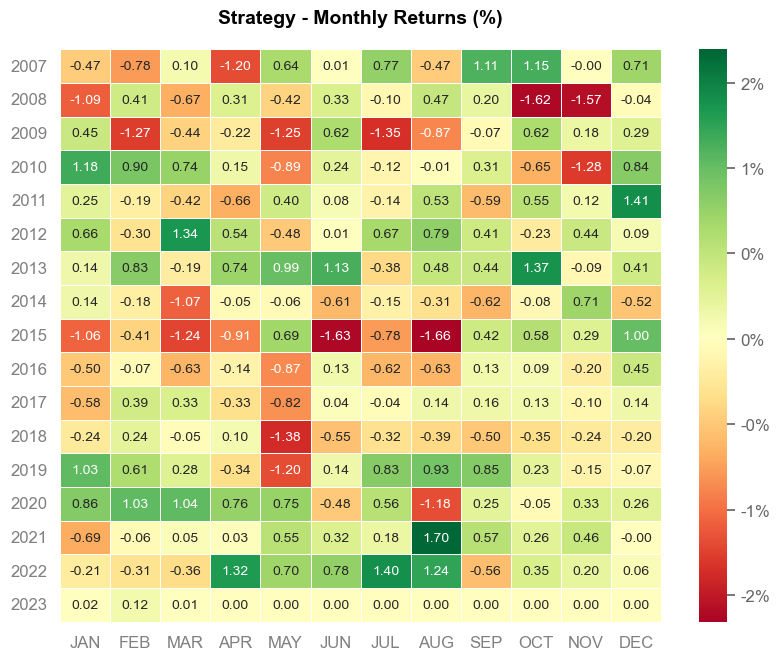

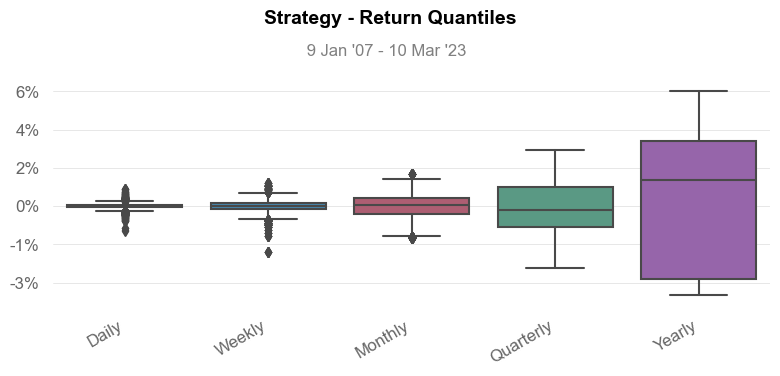

In [39]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())